<a href="https://colab.research.google.com/github/Rachanavk/Machine-Learning-/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

**Step 1: Data Loading**

In [58]:
dataset = pd.read_csv('/content/sample_data/tested.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Step 2: Data Analysis**

<Axes: xlabel='Survived', ylabel='count'>

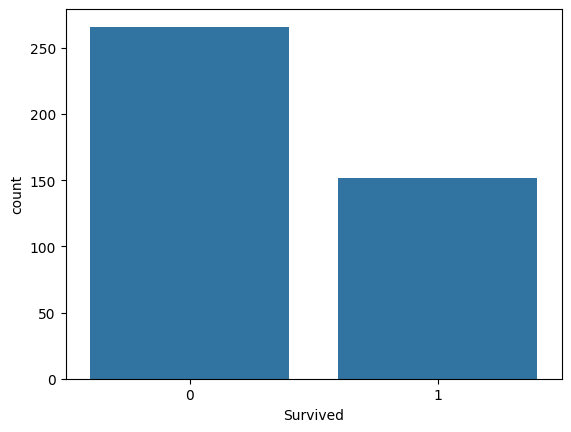

In [59]:
sns.countplot(x='Survived',data=dataset)

<Axes: xlabel='Survived', ylabel='count'>

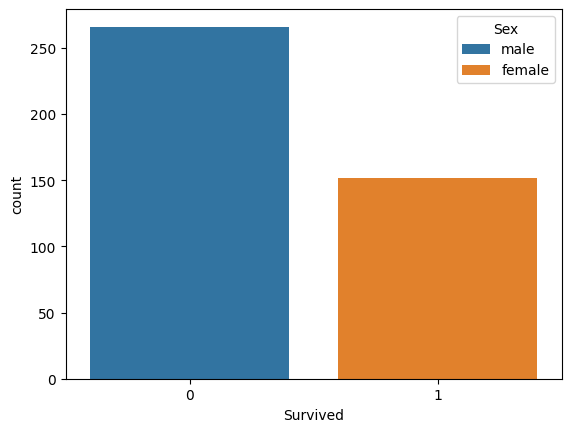

In [60]:
sns.countplot(x="Survived",hue="Sex",data=dataset)

<Axes: xlabel='Survived', ylabel='count'>

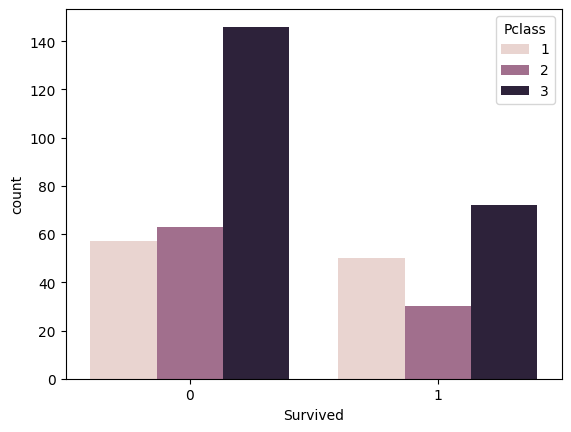

In [61]:
sns.countplot(x="Survived",hue="Pclass",data=dataset)

<Axes: xlabel='Survived', ylabel='count'>

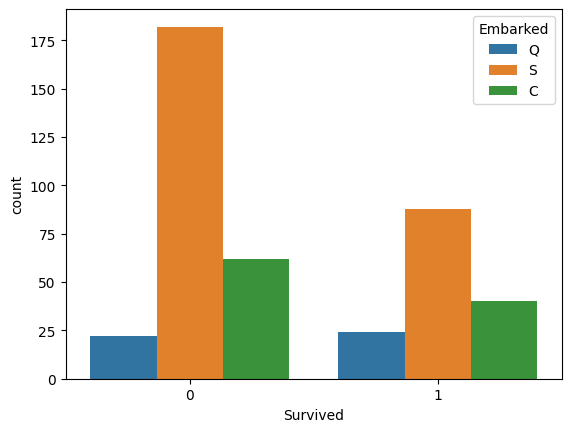

In [62]:
sns.countplot(x="Survived",hue="Embarked",data=dataset)

<Axes: ylabel='Frequency'>

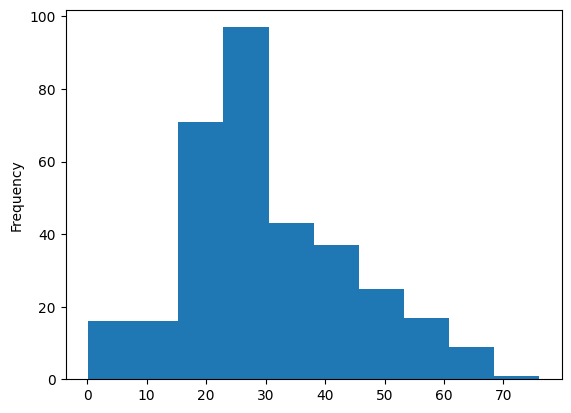

In [63]:
dataset['Age'].plot.hist()

<Axes: ylabel='Frequency'>

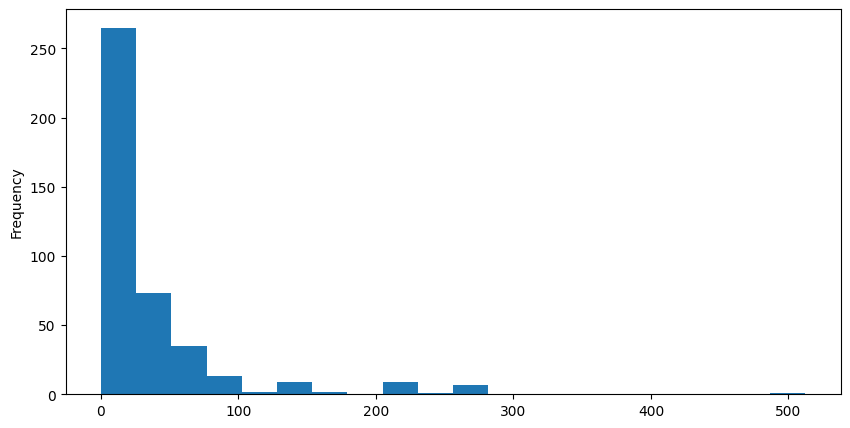

In [64]:
dataset['Fare'].plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

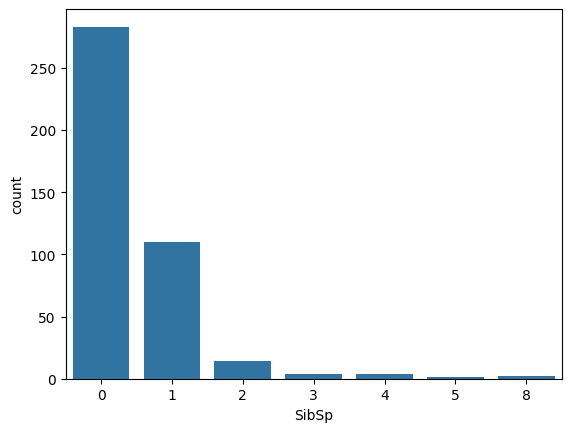

In [65]:

sns.countplot(x='SibSp',data=dataset)

<Axes: xlabel='Parch', ylabel='count'>

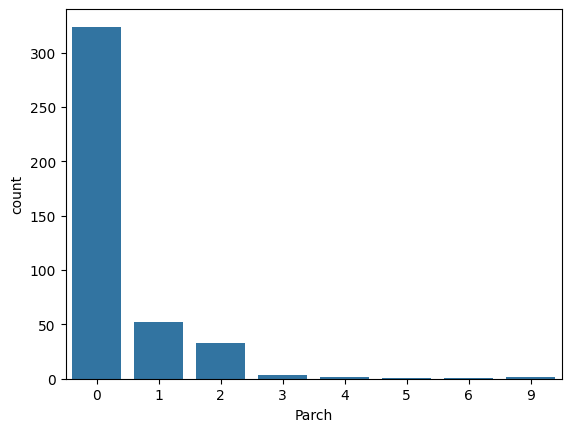

In [66]:
sns.countplot(x='Parch',data=dataset)

**Step 3: Data Wrangling(Data Cleaning)**

In [67]:
#to check whether null or no
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

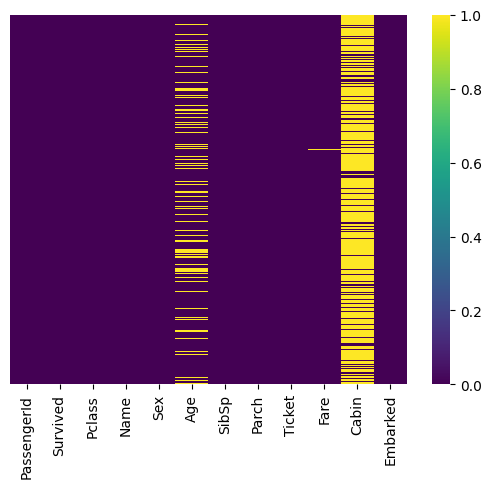

In [68]:
sns.heatmap(dataset.isnull(),yticklabels=False , cmap ='viridis' )

<Axes: xlabel='Pclass', ylabel='Age'>

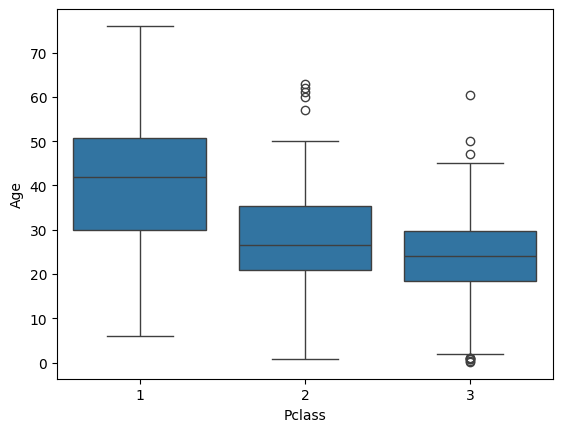

In [69]:
sns.boxplot(x='Pclass',y='Age',data=dataset)

<Axes: >

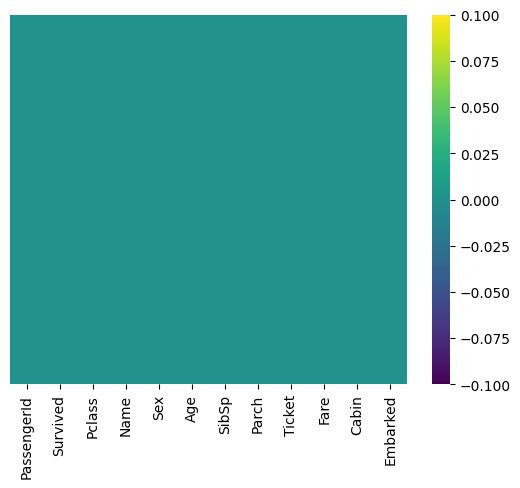

In [70]:
dataset.dropna(inplace=True)
dataset.isnull().sum()
sns.heatmap(dataset.isnull(),yticklabels=False , cmap ='viridis' )

In [71]:
#Converting String  to binary
#Sex
sex=pd.get_dummies(dataset['Sex'],drop_first=True)
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)
pclass=pd.get_dummies(dataset['Pclass'],drop_first=True)
dataset = pd.concat([dataset,sex,embark,pclass],axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,0,0,1,0,0
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,0,0,1,0,0
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,0,0,0,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,0,0,0,0,0
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1,0,1,0,0


In [72]:
dataset.drop(['Pclass','Embarked','Sex','PassengerId','Name','Ticket','Cabin'],axis = 1,inplace=True)


In [73]:
dataset.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
12,1,23.0,1,0,82.2667,0,0,1,0,0
14,1,47.0,1,0,61.1750,0,0,1,0,0
24,1,48.0,1,3,262.3750,0,0,0,0,0
26,1,22.0,0,1,61.9792,0,0,0,0,0
28,0,41.0,0,0,30.5000,1,0,1,0,0


**Step 4: Training and Testing Data**

In [74]:
X=dataset.drop("Survived",axis=1)
y=dataset['Survived'] #target

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
print(x_train)

      Age  SibSp  Parch      Fare  male  Q  S  2  3
355  50.0      0      0   26.0000     1  0  1  0  0
252  27.0      1      0  136.7792     1  0  0  0  0
326  12.0      2      1   39.0000     0  0  1  1  0
53   28.0      3      2  263.0000     0  0  1  0  0
131  53.0      0      0   28.5000     1  0  0  0  0
239  48.0      1      0  106.4250     0  0  0  0  0
343  58.0      0      1  512.3292     0  0  0  0  0
331  39.0      0      0   29.7000     1  0  0  0  0
177  54.0      1      0   55.4417     1  0  0  0  0
150  23.0      0      1   83.1583     0  0  0  0  0
272  26.0      1      0  136.7792     0  0  0  0  0
234  39.0      1      0   71.2833     1  0  0  0  0
50   24.0      1      0   60.0000     1  0  1  0  0
405  20.0      0      0   13.8625     1  0  0  1  0
74   35.0      0      0  211.5000     0  0  0  0  0
215  42.0      0      0   42.5000     1  0  1  0  0
184  27.0      1      1  247.5208     0  0  0  0  0
378  55.0      0      0   50.0000     1  0  1  0  0
48   60.0   

In [93]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [94]:
logmodel.fit(x_train,y_train)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [82]:
x_test.columns = x_test.columns.astype(str)
y_pred = logmodel.predict(x_test)

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [84]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        13\n           1       1.00      1.00      1.00        14\n\n    accuracy                           1.00        27\n   macro avg       1.00      1.00      1.00        27\nweighted avg       1.00      1.00      1.00        27\n'

In [87]:
accuracy_score(y_test,y_pred)

1.0